모든 변수 min-max 하고 smoke, SCC 삭제

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
obesity_df = pd.read_csv("/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/ObesityDataSet_Labeled_merge.csv")
obesity_df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,2,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,2,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,2,3,28.342381
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,1,20.195092
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,1,1,24.444444
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,2,1,19.705532
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,2,1,20.199470
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,2,1,22.985398


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
original_labeled_Scaled = obesity_df
ordinal_vars = ['Age', 'Height', 'Weight', 'CAEC', 'CALC', 'MTRANS', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
original_labeled_Scaled[ordinal_vars] = mm_scaler.fit_transform(original_labeled_Scaled[ordinal_vars])

original_labeled_Scaled.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.219417,0.474863,0.355120,0.817622,0.883941,0.709522,0.561876,0.380231,0.020843,0.504006,0.045476,0.336766,0.328933,0.243802,0.404074,3.112269,29.700159
std,0.500083,0.135021,0.176047,0.195457,0.386247,0.320371,0.266963,0.259346,0.156181,0.142893,0.306477,0.208395,0.283531,0.304464,0.171833,0.231751,1.985062,8.011337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998685
25%,0.000000,0.126536,0.339623,0.197562,1.000000,1.000000,0.500000,0.552913,0.333333,0.000000,0.292406,0.000000,0.041502,0.000000,0.000000,0.500000,1.000000,24.325802
50%,1.000000,0.186764,0.472640,0.328358,1.000000,1.000000,0.692751,0.666667,0.333333,0.000000,0.500000,0.000000,0.333333,0.312675,0.333333,0.500000,3.000000,28.719089
75%,1.000000,0.255319,0.600875,0.510677,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.738710,0.000000,0.555559,0.500000,0.333333,0.500000,5.000000,36.016501
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,50.811753


In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Train - Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    original_labeled_Scaled.drop(["SCC", "SMOKE", "BMI", "NObeyesdad"], axis=1),
    original_labeled_Scaled['NObeyesdad'],
    random_state=42,
    stratify=obesity_df['NObeyesdad']
)


# Train - Valid 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, random_state=42
)

X_train.shape, X_valid.shape, X_test.shape

((1187, 14), (396, 14), (528, 14))

In [7]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS
612,0,0.191882,0.254311,0.040124,0,0,0.602457,0.375932,0.666667,0.560146,0.331912,0.0,0.000000,0.5
289,1,0.106383,0.811321,0.298507,0,0,0.500000,0.666667,0.333333,1.000000,1.000000,0.0,0.333333,0.0
932,1,0.187839,0.491349,0.269723,1,1,0.893004,0.666667,0.333333,0.763097,0.308373,1.0,0.333333,0.5
586,0,0.085106,0.471698,0.082090,0,1,0.015575,0.666667,0.333333,0.481814,0.009401,0.5,0.333333,0.5
197,1,0.574468,0.566038,0.589552,1,1,0.500000,0.666667,0.333333,0.500000,0.000000,0.0,0.333333,1.0


In [8]:
y_test.head()

1553    5
69      1
1608    5
1416    4
1792    5
Name: NObeyesdad, dtype: int64

# 파이썬 래퍼

In [15]:
import time

start_time = time.time()

# XGBoost 돌릴때 전용 데이터 객체인 DMatrix 생성하기
d_train = xgb.DMatrix(data=X_train, label=y_train)
d_valid = xgb.DMatrix(data=X_valid, label=y_valid)
d_test  = xgb.DMatrix(data=X_test, label=y_test)

params = {
    'max_depth': 6, # 각 나무의 최대깊이
    'eta': 0.3, # 학습률(learning rate)
    'objective': 'multi:softmax', # 목적 함수(모델이 예측의 결과를 어떻게 표현할지를 지정하는 함수). logistic 함수를 사용하기 때문에 확률로 결과물을 내어준다.
    'num_class': 7, # 매개변수로 즉, 레이블에 있는 클래스의 개수를 나타내줌
    'eval_matric': 'merror' # 다중분류인 경우 merror를 사용
    }


# 학습 횟수
num_rounds = 400

eval_list = [
    (d_train, 'train'),
    (d_valid, 'eval')
]

xgb_model = xgb.train(
    params=params, # 하이퍼 파라미터가 들어있는 딕셔너리
    dtrain = d_train, # 훈련 데이터 Feature + Label
    num_boost_round=num_rounds, # 훈련 횟수
    early_stopping_rounds=50, # 성능 개선(Loss가 낮아지면 성능이 개선됨)이 50라운드 이내에 이루어지지 않으면 학습을 종료
    evals = eval_list # 검증 세트 지정. 여기에서는 훈련 세트와 검증세트에 대한 성능을 한꺼번에 확인
)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

[0]	train-mlogloss:1.22650	eval-mlogloss:1.24691
[1]	train-mlogloss:0.88682	eval-mlogloss:0.92239
[2]	train-mlogloss:0.67540	eval-mlogloss:0.72517
[3]	train-mlogloss:0.53101	eval-mlogloss:0.59219
[4]	train-mlogloss:0.41581	eval-mlogloss:0.48491
[5]	train-mlogloss:0.33253	eval-mlogloss:0.40972
[6]	train-mlogloss:0.27178	eval-mlogloss:0.35418
[7]	train-mlogloss:0.22415	eval-mlogloss:0.31092
[8]	train-mlogloss:0.18736	eval-mlogloss:0.28097
[9]	train-mlogloss:0.15661	eval-mlogloss:0.25172
[10]	train-mlogloss:0.13380	eval-mlogloss:0.22804
[11]	train-mlogloss:0.11214	eval-mlogloss:0.20654
[12]	train-mlogloss:0.09765	eval-mlogloss:0.19099
[13]	train-mlogloss:0.08445	eval-mlogloss:0.17792
[14]	train-mlogloss:0.07433	eval-mlogloss:0.16676
[15]	train-mlogloss:0.06459	eval-mlogloss:0.15650
[16]	train-mlogloss:0.05563	eval-mlogloss:0.14521
[17]	train-mlogloss:0.05008	eval-mlogloss:0.13982
[18]	train-mlogloss:0.04422	eval-mlogloss:0.13243
[19]	train-mlogloss:0.03996	eval-mlogloss:0.12755
[20]	train

In [16]:
import numpy as np

# 모델 만들 때 objective 함수를 logistic으로 지정했기 때문에 예측 시 확률 형식으로 예측 됨
pred_props = xgb_model.predict(d_test)
print(np.round(pred_props[:10], 3))

[5. 0. 5. 4. 5. 2. 2. 1. 2. 4.]


In [17]:
# 오차행렬
from sklearn.metrics import confusion_matrix

y_matrix = confusion_matrix(y_test, pred_props)
print("오차 행렬 : \n{}".format(y_matrix))

# 종속이 다중분류라 average를 'macro'를 부여
# https://data-minggeul.tistory.com/11 참고
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(pred_props, y_test)
precision = precision_score(pred_props, y_test, average='macro')
recall = recall_score(pred_props, y_test, average='macro')
f1 = f1_score(pred_props, y_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


오차 행렬 : 
[[63  5  0  0  0  0  0]
 [ 2 65  5  0  0  0  0]
 [ 0  4 67  2  0  0  0]
 [ 0  0  2 67  3  0  0]
 [ 0  0  0  0 88  0  0]
 [ 0  0  0  0  3 71  0]
 [ 0  0  0  0  0  1 80]]
정확도 : 0.9488636363636364
정밀도 : 0.9463894173134034
재현율 : 0.9494729099493205
F1 : 0.9475890203387042


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

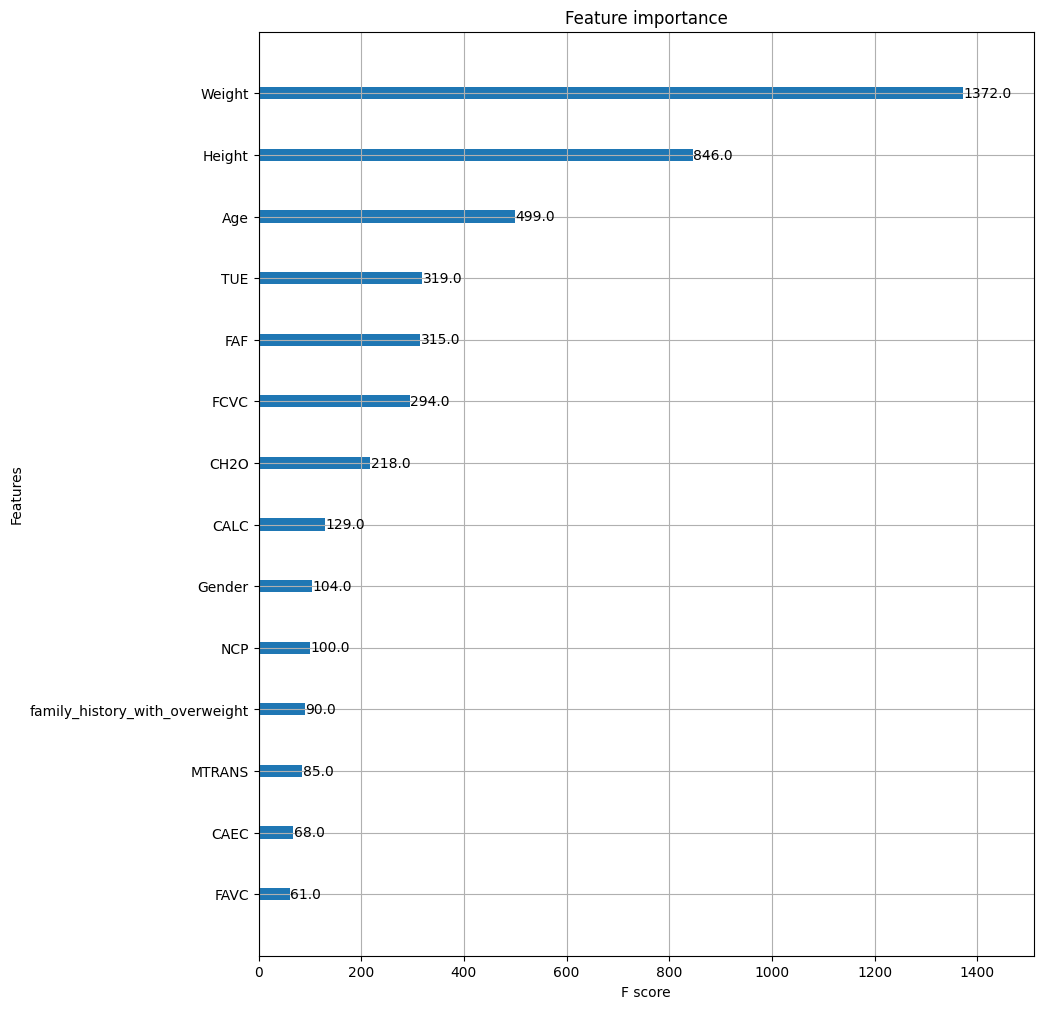

In [18]:
# feature importance

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

## 싸이킷런_조기중단X

In [19]:
import time
from xgboost import XGBClassifier

# 학습 시작 시간 기록
start_time = time.time()

xgb_clf_x = XGBClassifier(
    n_estimators=400, # 학습할 학습기의 개수(훈련 횟수)
    learning_rate=0.1, # 학습률
    max_depth=6,
    eval_metric='merror'
)

# 훈련
xgb_clf_x.fit(X_train, y_train, verbose=True) # verbose : 로그 출력 여부

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 사이킷런의 predict : 결정된 클래스가 나옴
preds = xgb_clf_x.predict(X_test)
preds[:10]

Training time: 1.0671231746673584 seconds


array([5, 0, 5, 4, 5, 2, 2, 1, 2, 4])

In [20]:
# 성능 평가하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(preds, y_test)
precision = precision_score(preds, y_test, average='macro')
recall = recall_score(preds, y_test, average='macro')
f1 = f1_score(preds, y_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

정확도 : 0.9431818181818182
정밀도 : 0.9404642161827228
재현율 : 0.9437075720867961
F1 : 0.9416681859184142


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

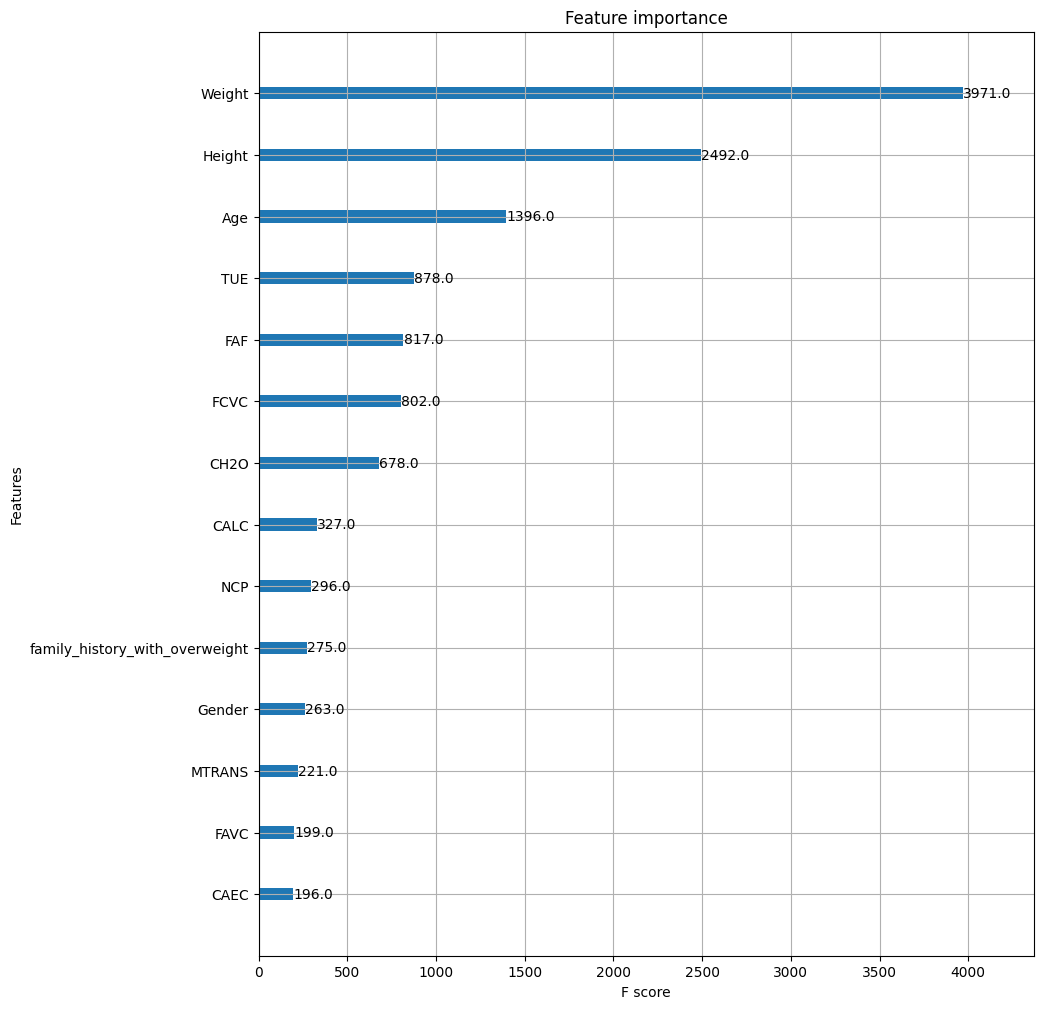

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf_x, ax=ax)

## 조기중단O

In [24]:
import time
from xgboost import XGBClassifier

# 학습 시작 시간 기록
start_time = time.time()

# Early Stopping
xgb_clf_o = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='merror'
)

# 검증 세트를 따로 지정

# eval_sets : 검증 데이터 목록
# (Train), (Valid) : 훈련 세트로 검증을 하고, 검증 세트로 검증
#   훈련 세트로 검증 : 학습한 내용에 대한 검증을 수행( 알고 있는 데이터에 대한 검증 )
#   검증 세트로 검증 : 모르는 내용에 대한 검증을 수행

#  두 개를 같이 하는 이유 : 과대 적합인지 확인하기 위해
eval_sets = [
    (X_train, y_train),
    (X_valid, y_valid)
]

xgb_clf_o.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_set = eval_sets,
    verbose=True
)


# 학습 종료 시간 기록
end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")


[0]	validation_0-merror:0.06318	validation_1-merror:0.07828
[1]	validation_0-merror:0.05223	validation_1-merror:0.07071
[2]	validation_0-merror:0.05560	validation_1-merror:0.07576
[3]	validation_0-merror:0.05223	validation_1-merror:0.07323
[4]	validation_0-merror:0.04549	validation_1-merror:0.06061
[5]	validation_0-merror:0.04212	validation_1-merror:0.05303
[6]	validation_0-merror:0.04044	validation_1-merror:0.05556
[7]	validation_0-merror:0.03623	validation_1-merror:0.05556
[8]	validation_0-merror:0.03454	validation_1-merror:0.05556
[9]	validation_0-merror:0.03117	validation_1-merror:0.05556
[10]	validation_0-merror:0.02864	validation_1-merror:0.05556
[11]	validation_0-merror:0.02527	validation_1-merror:0.05556
[12]	validation_0-merror:0.02275	validation_1-merror:0.05303
[13]	validation_0-merror:0.01853	validation_1-merror:0.05303
[14]	validation_0-merror:0.01601	validation_1-merror:0.05051
[15]	validation_0-merror:0.01516	validation_1-merror:0.05303
[16]	validation_0-merror:0.01179	v

In [25]:
# 사이킷런의 predict : 결정된 클래스가 나옴
final_preds = xgb_clf_o.predict(X_test)
final_preds[:10]

y_matrix = confusion_matrix(y_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(final_preds, y_test)
precision = precision_score(final_preds, y_test, average='macro')
recall = recall_score(final_preds, y_test, average='macro')
f1 = f1_score(final_preds, y_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[63  5  0  0  0  0  0]
 [ 2 64  5  1  0  0  0]
 [ 0  5 65  3  0  0  0]
 [ 0  0  3 65  4  0  0]
 [ 0  0  0  0 88  0  0]
 [ 0  0  0  1  1 72  0]
 [ 0  0  0  0  0  1 80]]
정확도 : 0.9412878787878788
정밀도 : 0.9384536439666711
재현율 : 0.9408022786534244
F1 : 0.9393915733840784


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

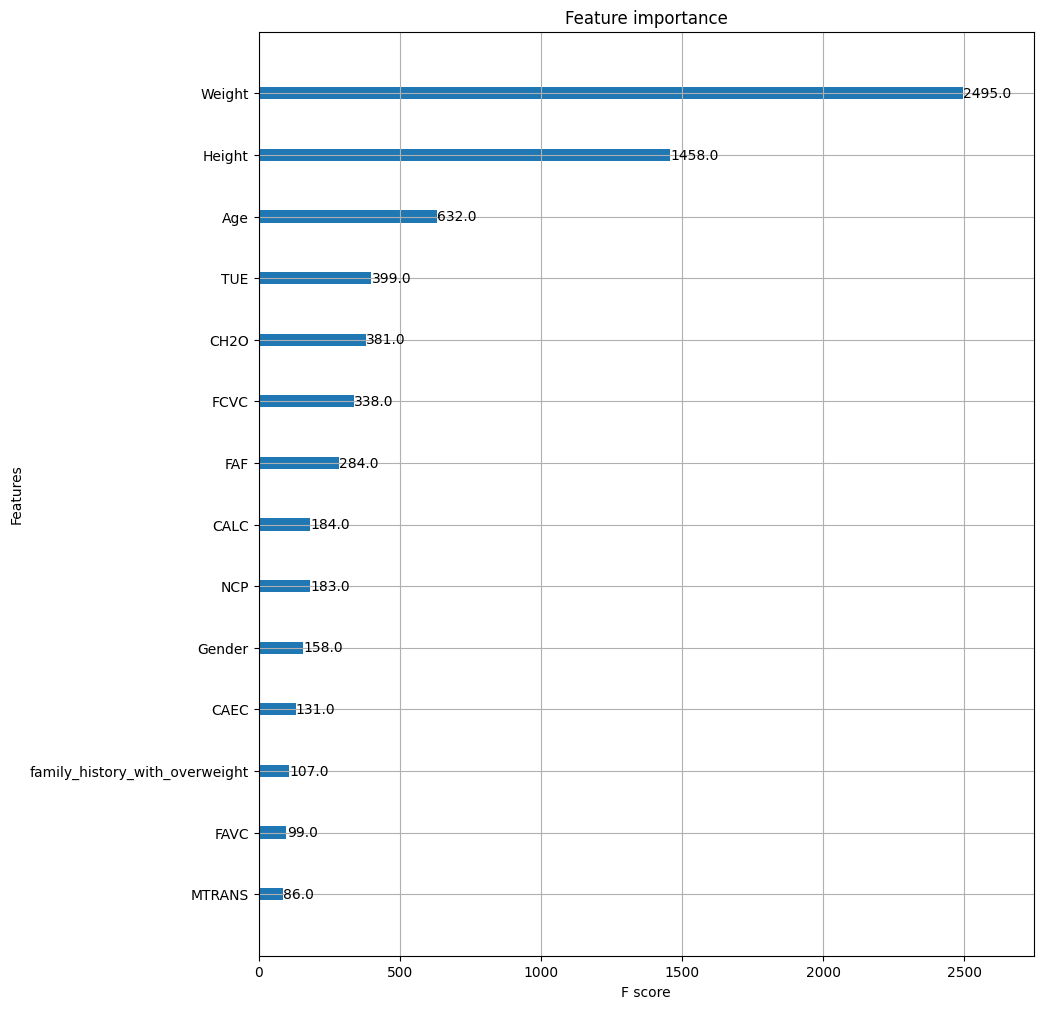

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf_o, ax=ax)